In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
data = pd.read_csv("D:\\Mars Rover Manipal\\Car Prices\\CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
dt=data
data = pd.get_dummies(data, columns=["fueltype", "aspiration","doornumber","carbody","drivewheel","cylindernumber", "enginetype", "fuelsystem"])
data=data.drop(['fuelsystem_spfi','fuelsystem_mfi','cylindernumber_three','cylindernumber_twelve','enginetype_dohcv','carbody_convertible','carbody_hardtop','drivewheel_4wd','enginetype_dohc'],axis=1)

In [20]:
f1=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
df1=data[f1]

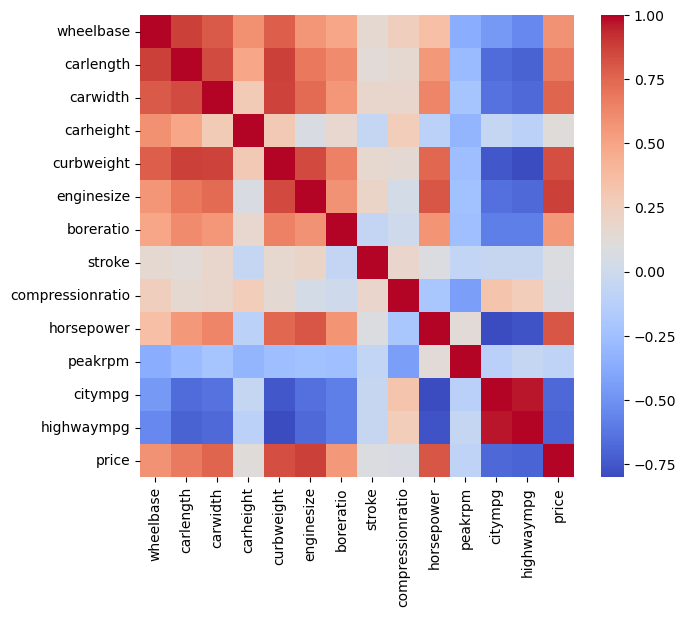

In [21]:
plt.figure(figsize=(7, 6))
sns.heatmap(df1.corr(),cmap="coolwarm")
plt.show()

In [22]:
f2=list(data.columns[18:])+["price"]
df2=data[f2]

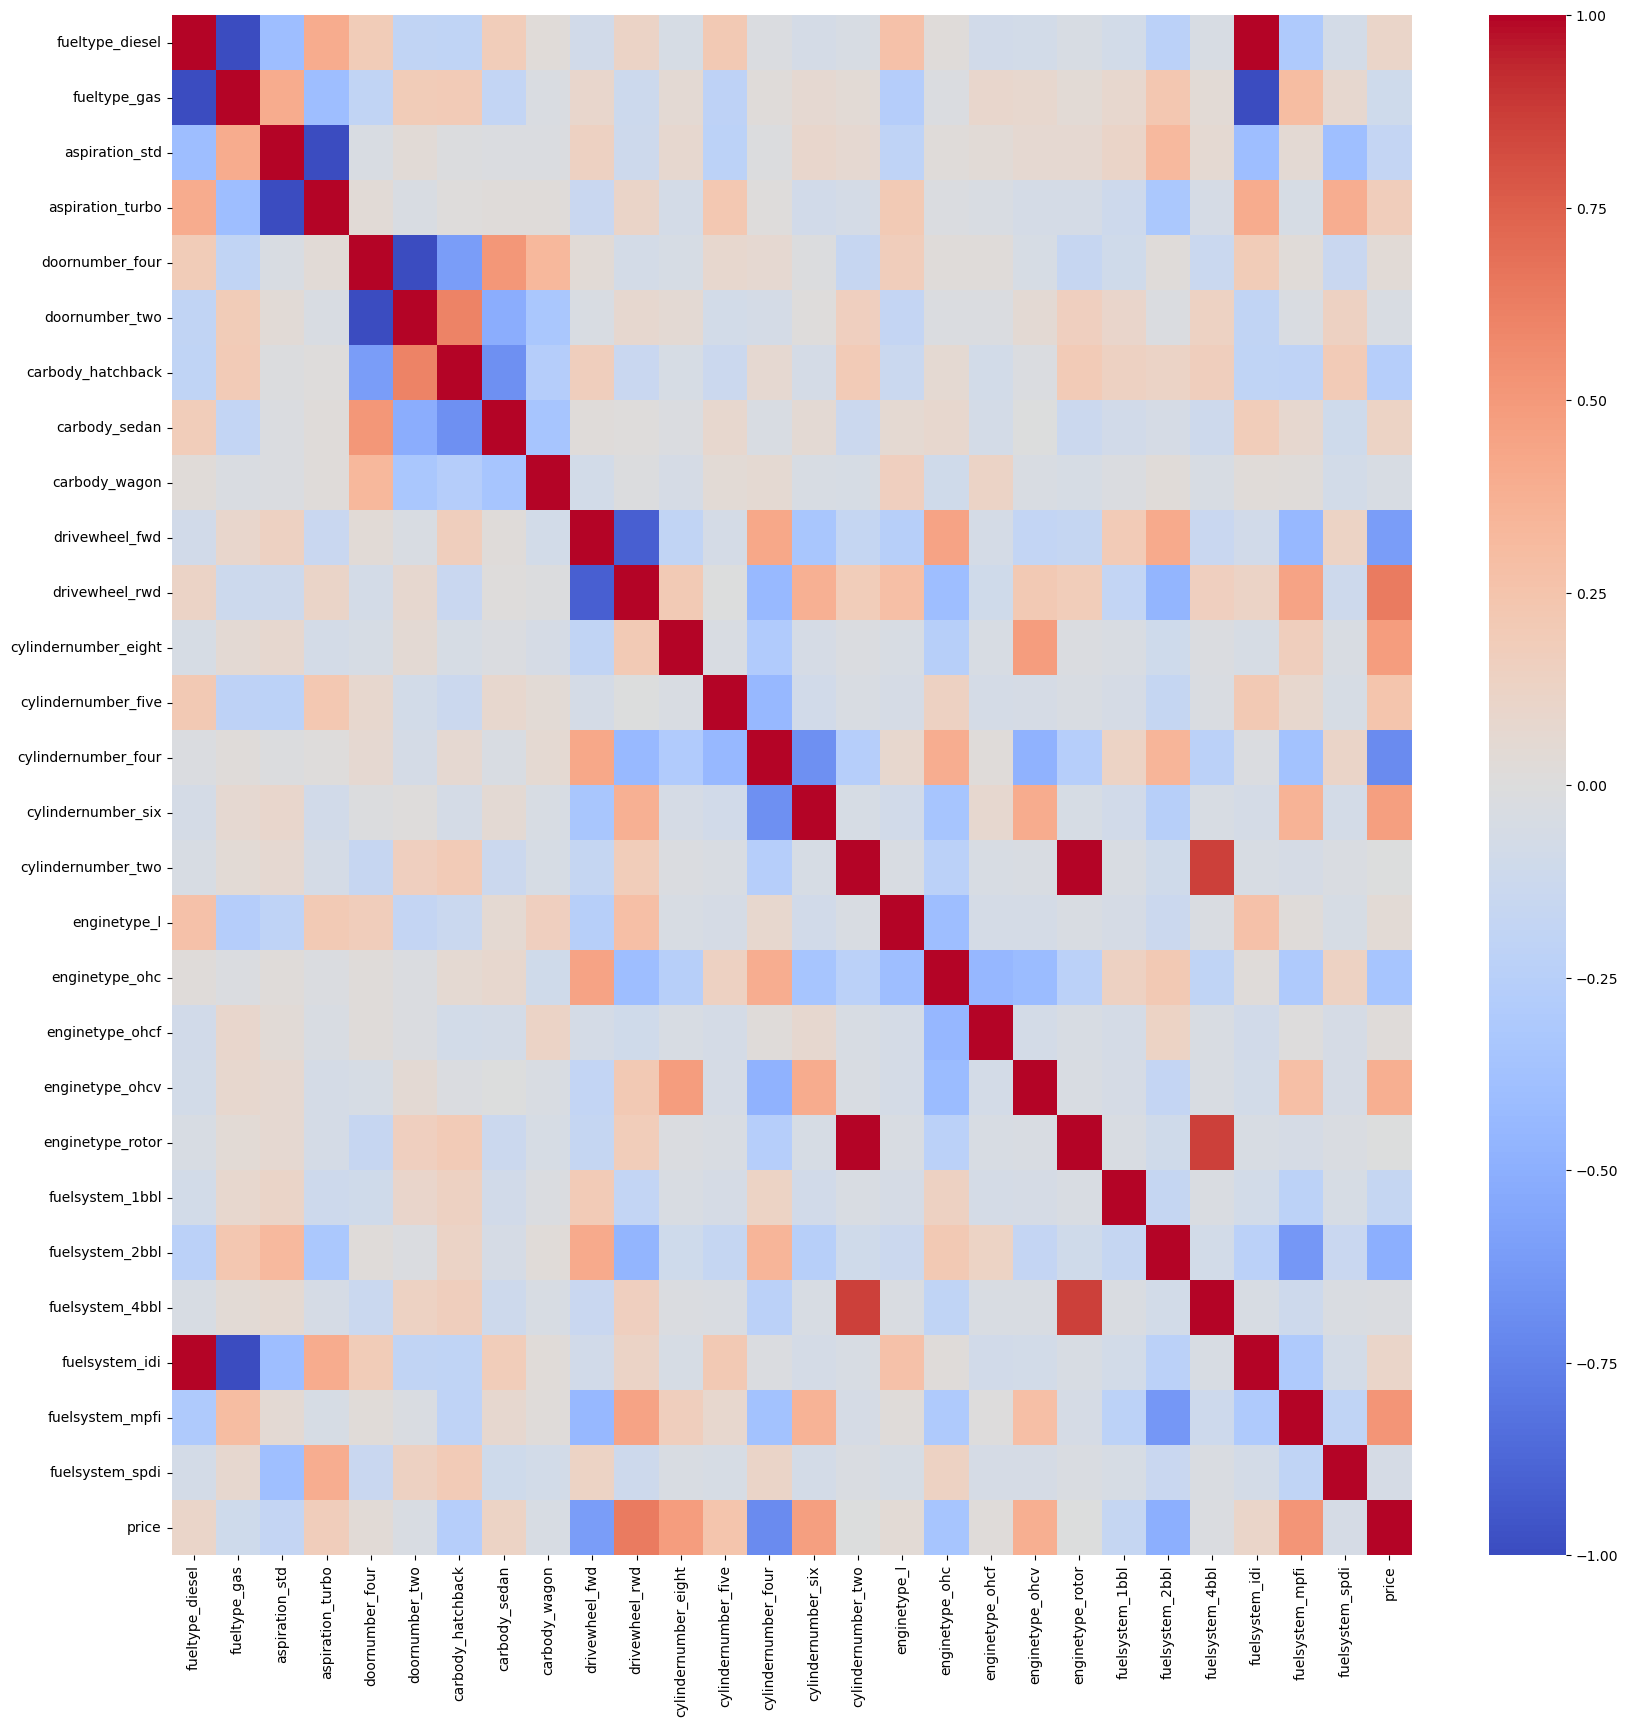

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(),cmap="coolwarm")
plt.show()

In [24]:
f3 = ["wheelbase", "carlength", "carwidth","curbweight", "enginesize", "boreratio","horsepower","highwaympg"] + list(data.columns[18:])+["price"]
df3=data[f3]
df3=df3.drop(['fueltype_gas','fueltype_diesel','aspiration_std','aspiration_turbo','doornumber_two','doornumber_four','drivewheel_rwd','fuelsystem_idi','fuelsystem_4bbl','enginetype_rotor','drivewheel_fwd'],axis=1)

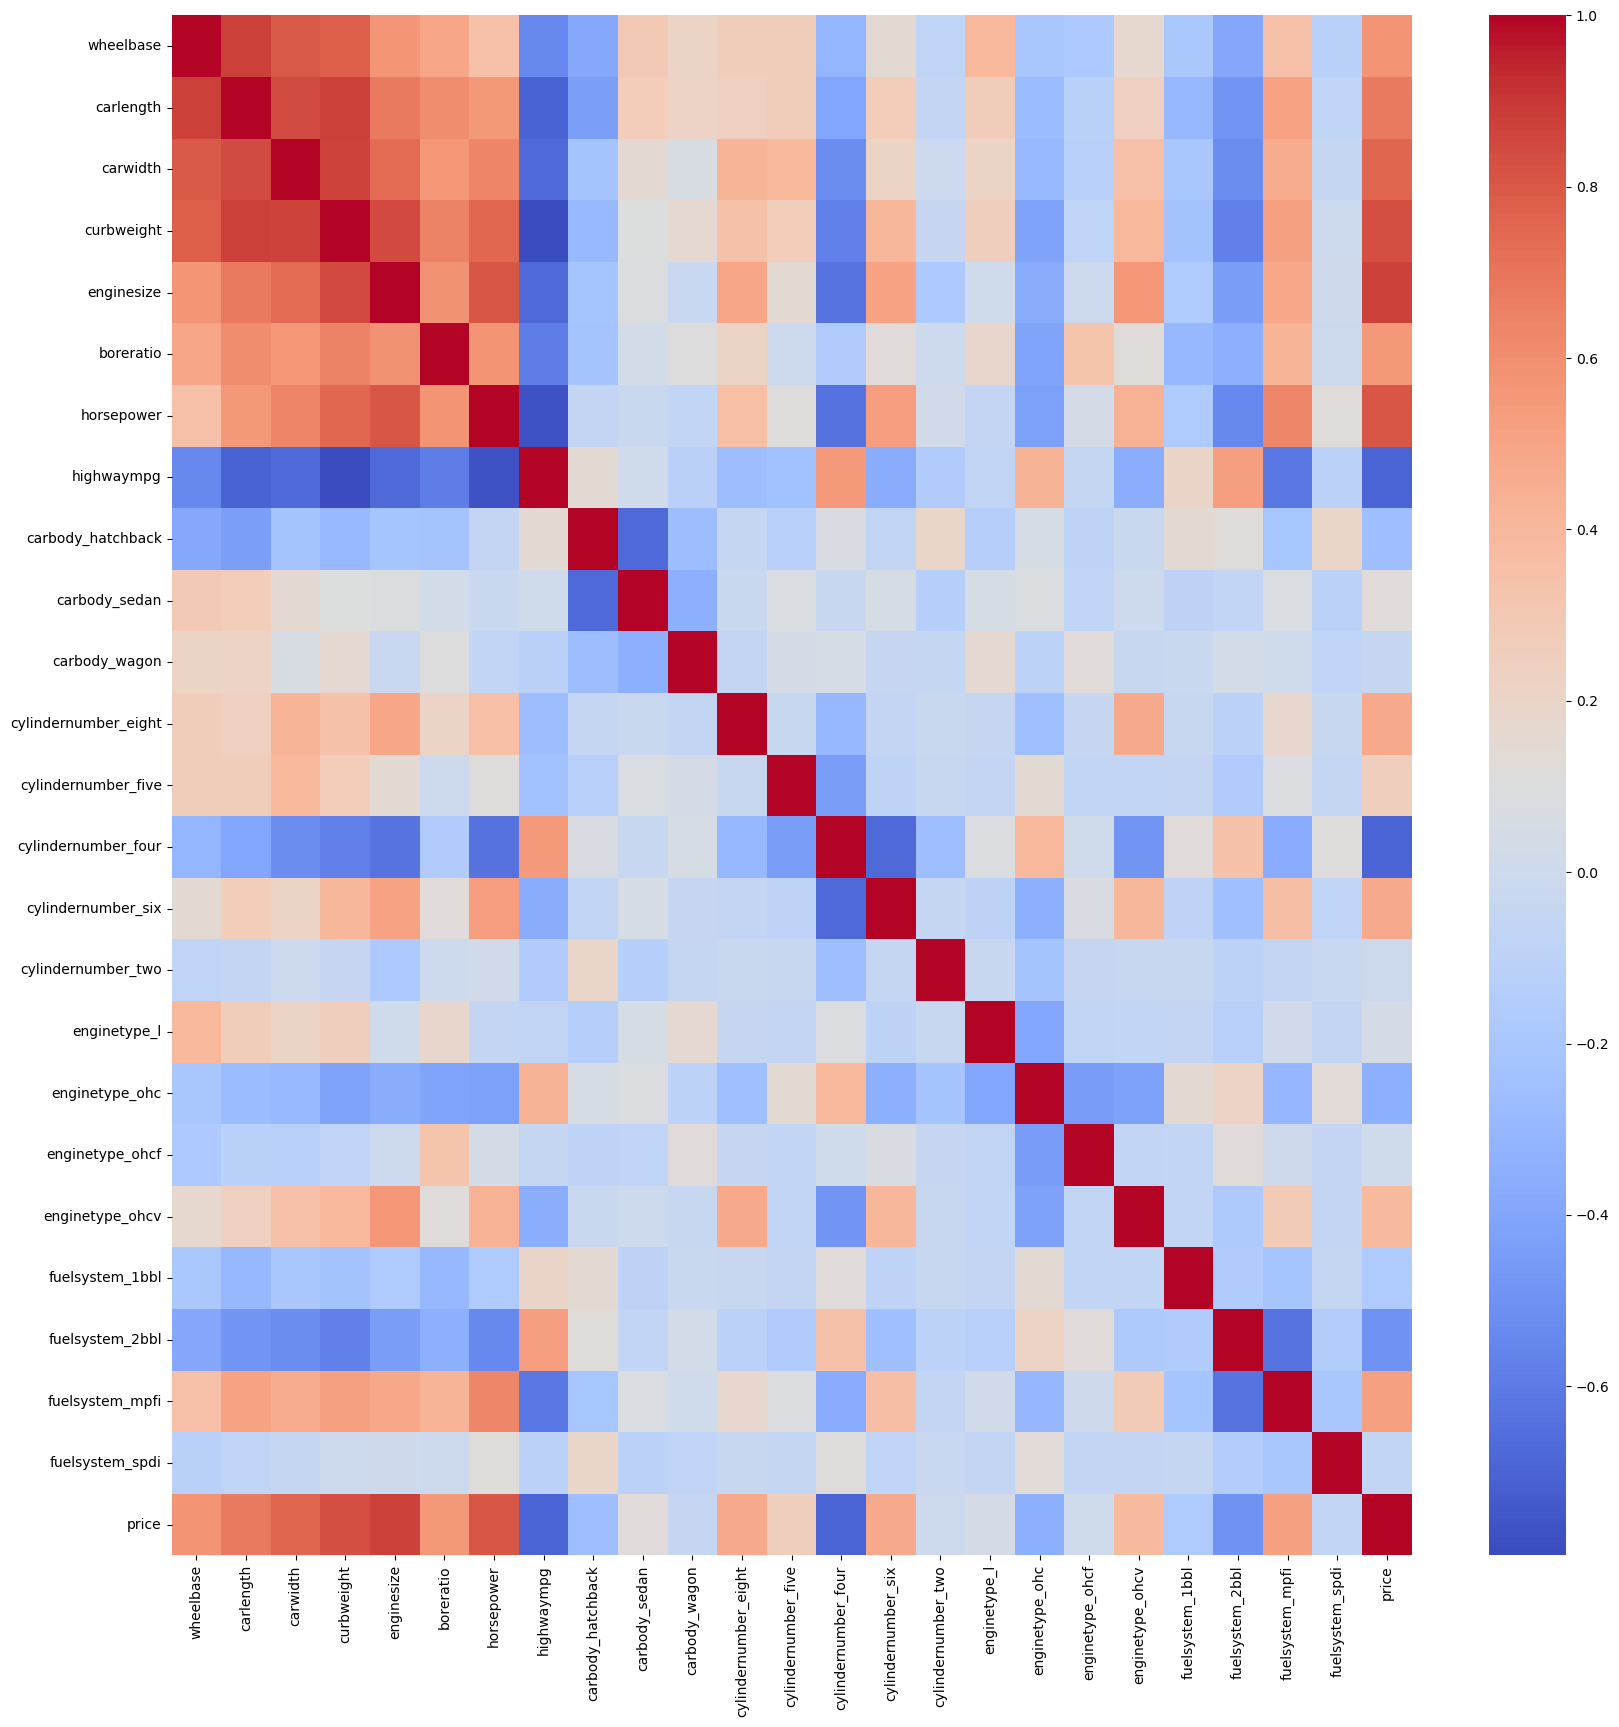

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(df3.corr(),cmap="coolwarm")
plt.show()

In [26]:
train_data, test_data, train_labels, test_labels = train_test_split(df3, data["price"], test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

In [27]:
for i in train_data.T:
    mean=train_data.mean()
    std=train_data.std()
    train_data=(train_data-mean)/std

for i in val_data.T:
    mean=val_data.mean()
    std=val_data.std()
    val_data=(val_data-mean)/std

for i in test_data.T:
    mean=test_data.mean()
    std=test_data.std()
    test_data=(test_data-mean)/std
    

In [35]:
train_data = np.hstack((np.ones((train_data.shape[0], 1)), train_data))
val_data = np.hstack((np.ones((val_data.shape[0], 1)), val_data))
test_data = np.hstack((np.ones((test_data.shape[0], 1)), test_data))

weights = np.zeros(train_data.shape[1])

learning_rate = 0.1
num_epochs = 500

train_losses = []
val_losses = []


In [36]:
for epoch in range(num_epochs):
    train_preds = np.dot(train_data, weights)
    train_errors = train_preds - train_labels
    
    train_loss = np.mean(train_errors ** 2)
    train_losses.append(train_loss)
    
    gradients = np.dot(train_data.T, train_errors) / train_data.shape[0]
    
    weights -= learning_rate * gradients

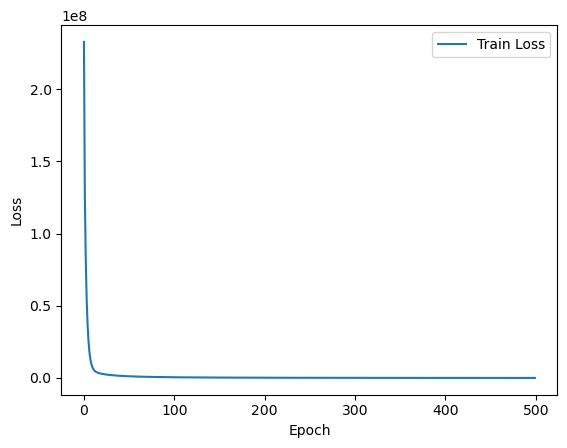

In [37]:
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
v_mean = val_labels.mean()
nn = val_data.shape[0]
pp = val_data.shape[1] - 1
predictions_val = np.dot(val_data, weights)
ts = ((val_labels - v_mean) ** 2).sum()
rs = ((val_labels - predictions_val) ** 2).sum()
r = 1 - (rs / ts)
adj_r = 1 - ((1 - r) * (nn - 1) / (nn - pp - 1))

print("VALIDATION SET")
print("R-squared: ",r)
print("Adjusted R-squared: " ,adj_r)

VALIDATION SET
R-squared:  0.9743249993465919
Adjusted R-squared:  0.9266428552759768


In [39]:
val_errors = predictions_val - val_labels
ms = np.mean(val_errors ** 2)
ma = np.mean(np.abs(val_errors))

print("VALIDATION SET")
print("Mean Squared Error: " ,ms)
print("Mean Absolute Error: " ,ma)

VALIDATION SET
Mean Squared Error:  1905509.4885321744
Mean Absolute Error:  1157.451280824987


In [40]:
t_mean = test_labels.mean()
n = test_data.shape[0]
p = test_data.shape[1] - 1
predictions_test = np.dot(test_data, weights)
tss = ((test_labels - t_mean) ** 2).sum()
rss = ((test_labels - predictions_test) ** 2).sum()
r_squared = 1 - (rss / tss)
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("TEST SET")
print("R-squared: ",r_squared)
print("Adjusted R-squared: " ,adj_r_squared)

TEST SET
R-squared:  0.9689140781478494
Adjusted R-squared:  0.9111830804224267


In [41]:
test_errors = predictions_test - test_labels

mse = np.mean(test_errors ** 2)
mae = np.mean(np.abs(test_errors))

print("TEST SET")
print("Mean Squared Error: " ,mse)
print("Mean Absolute Error: " ,mae)

TEST SET
Mean Squared Error:  2454047.6637595883
Mean Absolute Error:  1036.8546174330088
